### Project Work - MovieLens Data Analysis ( by Prabhu Ramachandran)

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
df1=pd.read_csv('data.csv') # df1 = import dataset data.csv file
df2=pd.read_csv('item.csv') # df2 = import dataset item.csv file
df3=pd.read_csv('user.csv') # df3 = import dataset user.csv file

In [3]:
df1.head() # to check what is in df1 = dataset data.csv file      --- first 5 rows

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df1  

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [5]:
df2.head() # to check what is in df2 = dataset item.csv file        --- first 5 rows

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df2

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df3.head() # to check what is in df3 = dataset user.csv file      --- first 5 rows

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
df3

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [9]:
df1.info() # To Check column types and missing values in df1 = 'data.csv' -- there are no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [10]:
 # To find shape and size of df1 = 'data.csv'
print(df1.shape) 
print(df1.size)   

(100000, 4)
400000


In [11]:
df1.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [12]:
# find missing values in df1 = 'data.csv' data set
df1.isnull().sum()# you can also check which columns have null value  -- no columns have null value  ??? but there are '0' entered 

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [13]:
df2.info() # To Check column types and missing values in df2 = dataset item.csv file 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [14]:
# To find shape and size of df2 = 'item.csv' dataset
print(df2.shape)
print(df2.size)

(1681, 22)
36982


In [15]:
df2.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df2.count()

movie id        1681
movie title     1681
release date    1681
unknown         1681
Action          1681
Adventure       1681
Animation       1681
Childrens       1681
Comedy          1681
Crime           1681
Documentary     1681
Drama           1681
Fantasy         1681
Film-Noir       1681
Horror          1681
Musical         1681
Mystery         1681
Romance         1681
Sci-Fi          1681
Thriller        1681
War             1681
Western         1681
dtype: int64

In [17]:
# find missing values in df2 = 'item.csv' data set
df2.isnull().sum()# you can also check which columns have nul value -- no columns have null value

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [18]:
df3.info() # To Check column types and missing values in df2 = dataset item.csv file there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [19]:
df3.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [20]:
# To find shape and size of df3 = 'user.csv'
print(df3.shape)
print(df3.size)

(943, 5)
4715


In [21]:
df3.count()

user id       943
age           943
gender        943
occupation    943
zip code      943
dtype: int64

In [22]:
# find missing values in df3 = 'user.csv' data set
df3.isnull().sum()# you can also check which columns have nul value -- no columns have null value

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [23]:
df2.sum (axis=0)   # sum of movies each genre are shown from ' unknown = 1, Action = 251 to ... to , War=71, Western = 27'

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [24]:
#df2.drop('movie id',axis=1,inplace=True)   # this will drop 'movie id' 

In [25]:
#df2.sum (axis=0)     #  dropped movie id and sum of movies each genre are shown from ' unknown = 1, action = 251 to ..western = 27'

In [26]:
print(df2['movie title'], [df2.sum (axis=1)])



0                                Toy Story 
1                                GoldenEye 
2                               Four Rooms 
3                               Get Shorty 
4                                  Copycat 
                       ...                 
1676                            Mat' i syn 
1677                             B. Monkey 
1678                         Sliding Doors 
1679                          You So Crazy 
1680    Scream of Stone (Schrei aus Stein) 
Name: movie title, Length: 1681, dtype: object [0          4
1          5
2          4
3          7
4          8
        ... 
1676    1679
1677    1681
1678    1682
1679    1682
1680    1683
Length: 1681, dtype: int64]


In [27]:
df2.groupby ('movie title')['release date'].sum().sort_values(ascending = False).head(10)


movie title
Good Morning                                       4-Feb-1971
Dragonheart                                       31-May-1996
Arrival, The                                      31-May-1996
Eddie                                             31-May-1996
Chain Reaction                                    31-Jul-1996
Prisoner of the Mountains (Kavkazsky Plennik)     31-Jan-1997
Waiting for Guffman                               31-Jan-1997
Shadow Conspiracy                                 31-Jan-1997
Meet Wally Sparks                                 31-Jan-1997
Oscar & Lucinda                                   31-Dec-1997
Name: release date, dtype: object

In [28]:
df2

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 5. Find the movies that have more than one genre - 5 marks

In [29]:
df2.drop('movie id',axis=1,inplace=True)   # this will drop 'movie id' 

In [30]:
# sum of all coloumn currently adding the year extract need to add before extrating year from date
# ' Genre_Sum' is the last column to the right 22nd column
df2['Genre_Sum'] = df2.sum(axis=1)   # adds up all '1' in Genre in a row  and Sum is shown in new column 'Genre_Sum'


In [31]:
df2

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genre_Sum
0,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1677,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1678,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1679,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df2.groupby ('movie title')['Genre_Sum'].sum().sort_values(ascending = False).head(849)
# There are 848 Movie title listed which has genre's above 1
# Found 'That Darn Cat!'' movie is listed 3 times movie id 878, 1003 and 1444  that why sum is 3+3+3 = 9
#  Found 'Body Snatchers' movie is listed 2 times movie id 573 & movie id 670 that why sum is 3+3 = 6

movie title
That Darn Cat!                    9
Kid in King Arthur's Court, A     6
Body Snatchers                    6
Transformers: The Movie, The      6
Desperate Measures                6
                                 ..
Object of My Affection, The       2
Once Were Warriors                2
Supercop                          2
Shiloh                            2
Coldblooded                       1
Name: Genre_Sum, Length: 849, dtype: int64

In [33]:
df2.groupby ('movie title')['Genre_Sum'].sum().sort_values(ascending = False)     #--- this gives 1658

movie title
That Darn Cat!                    9
Kid in King Arthur's Court, A     6
Body Snatchers                    6
Transformers: The Movie, The      6
Desperate Measures                6
                                 ..
Rosewood                          1
Gridlock'd                        1
Great White Hype, The             1
Ruby in Paradise                  1
Feast of July                     1
Name: Genre_Sum, Length: 1658, dtype: int64

In [34]:
# ----------------   (to be deleted)
#df2.groupby ('movie title')['Genre_Sum'].sort_values(ascending=False).head()
#df2 = df2[df2.groupby(['c0','c1'])['c2'].transform('count') > 1]
#df2 = df2[df2.groupby(['movie title','Genre_Sum'])['Genre_Sum'].transform('Genre_Sum') > 1]

In [35]:
df2.sum (axis=0)

movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical                                                        56
Mystery   

In [36]:
### to be deleted    --------------------------------------------- 
#df2.groupby ('movie title')['df2.sum (axis=1)']

In [37]:
# Trial to be deleted later
df2.groupby ('movie title')['release date'].sum().sort_values(ascending = False).head(10)

movie title
Good Morning                                       4-Feb-1971
Dragonheart                                       31-May-1996
Arrival, The                                      31-May-1996
Eddie                                             31-May-1996
Chain Reaction                                    31-Jul-1996
Prisoner of the Mountains (Kavkazsky Plennik)     31-Jan-1997
Waiting for Guffman                               31-Jan-1997
Shadow Conspiracy                                 31-Jan-1997
Meet Wally Sparks                                 31-Jan-1997
Oscar & Lucinda                                   31-Dec-1997
Name: release date, dtype: object

In [38]:
# Trial to be deleted later
df2.groupby ('movie title')['release date'].sum().sort_values(ascending = True).head(10)

movie title
Air Bud                                               01-Aug-1997
Spawn                                                 01-Aug-1997
In the Company of Men                                 01-Aug-1997
Picture Perfect                                       01-Aug-1997
Letter From Death Row, A                              01-Feb-1998
Tainted                                               01-Feb-1998
Nosferatu (Nosferatu, eine Symphonie des Grauens)     01-Jan-1922
Blue Angel, The (Blaue Engel, Der)                    01-Jan-1930
M                                                     01-Jan-1931
Farewell to Arms, A                                   01-Jan-1932
Name: release date, dtype: object

In [39]:
# Trial to be deleted later
df2.groupby ('release date')['movie title'].sum().sort_values(ascending = False).head(10)

release date
01-Jan-1939    Wizard of Oz, The Gone with the Wind Mr. Smith...
14-Mar-1998                        Wild Things Newton Boys, The 
24-May-1996                   Welcome to the Dollhouse Spy Hard 
01-Jan-1989    Weekend at Bernie's Abyss, The Henry V Dead Po...
13-Feb-1998    Wedding Singer, The Sphere Ayn Rand: A Sense o...
05-Apr-1996    Wallace & Gromit: The Best of Aardman Animatio...
20-Dec-1971                                           Walkabout 
15-Jan-1996                                   Waiting to Exhale 
09-Jan-1998           Wag the Dog Dark City Firestorm Senseless 
25-Apr-1997    Volcano Romy and Michele's High School Reunion...
Name: movie title, dtype: object

In [40]:
# Trial to be deleted later
#df2.groupby ('release date ')['movie title'].sum().sort_values(ascending = True).head(10)

In [41]:
df2

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genre_Sum
0,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1677,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1678,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1679,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# from df2= 'release date' column extract and create new column 'release year'
df2['release year'] = pd.DatetimeIndex(df2['release date']).year 
#df2.head()

In [43]:
# just to check and count whcih movie title repeated --- found below 22 titles has repeated  thrice or two times
df2.groupby('movie title')['Genre_Sum'].count().sort_values(ascending = False).head(23) 

movie title
That Darn Cat!              3
Designated Mourner, The     2
Body Snatchers              2
Substance of Fire, The      2
Deceiver                    2
Ice Storm, The              2
Fly Away Home               2
Chasing Amy                 2
Money Talks                 2
Scarlet Letter, The         2
Shall We Dance?             2
Hugo Pool                   2
Butcher Boy, The            2
Desperate Measures          2
Chairman of the Board       2
Cape Fear                   2
Ulee's Gold                 2
Sliding Doors               2
Nightwatch                  2
Hurricane Streets           2
Sabrina                     2
Kull the Conqueror          2
Foreign Student             1
Name: Genre_Sum, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [44]:
df2.groupby('unknown')['movie title'].sum()  #    Good Morning is the unknown movie = 1

unknown
0    Toy Story GoldenEye Four Rooms Get Shorty Copy...
1                                        Good Morning 
Name: movie title, dtype: object

In [45]:
print(df2.shape)   # Total 1681 rows x 23 columns

(1681, 23)


In [46]:
df2.drop(df2[df2['unknown'] ==1].index, inplace = True) # drop row where unknown =1

In [47]:
print(df2.shape)   #      After dropping row Total 1680 rows x 23 columns  --- 1 row got dropped

(1680, 23)


In [48]:
df2.groupby('unknown')['movie title'].sum()  #    below confirms Good Morning" row was dropped

unknown
0    Toy Story GoldenEye Four Rooms Get Shorty Copy...
Name: movie title, dtype: object

##  below are all trials to be deleted

In [49]:
#df = df.dropna(how = 'all')
# Filter all rows for which the player's 
# age is greater than or equal to 25 
#df.drop(df[df['Age'] < 25].index, inplace = True) 
# Print the modified dataframe 
#print(df.head(15)) 
# Print the shape of the dataframe 
#print(df.shape) 

In [50]:
#data.groupby('month')['duration'].sum()

#df2.sum ['movie title']

#df2 [ df2['movie title']==0 ]



In [51]:
# if unknown = 1 then drop that row : Goodmorning movie , movie id = 1373 genre is unknown.
#df2.drop('e id',axis=1,inplace=True)   # this will drop 'movie id' 

In [52]:
# df2[['movie title','totalprod']].groupby('movie title').mean()   ################   trial data

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [53]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.



<AxesSubplot:xlabel='age'>

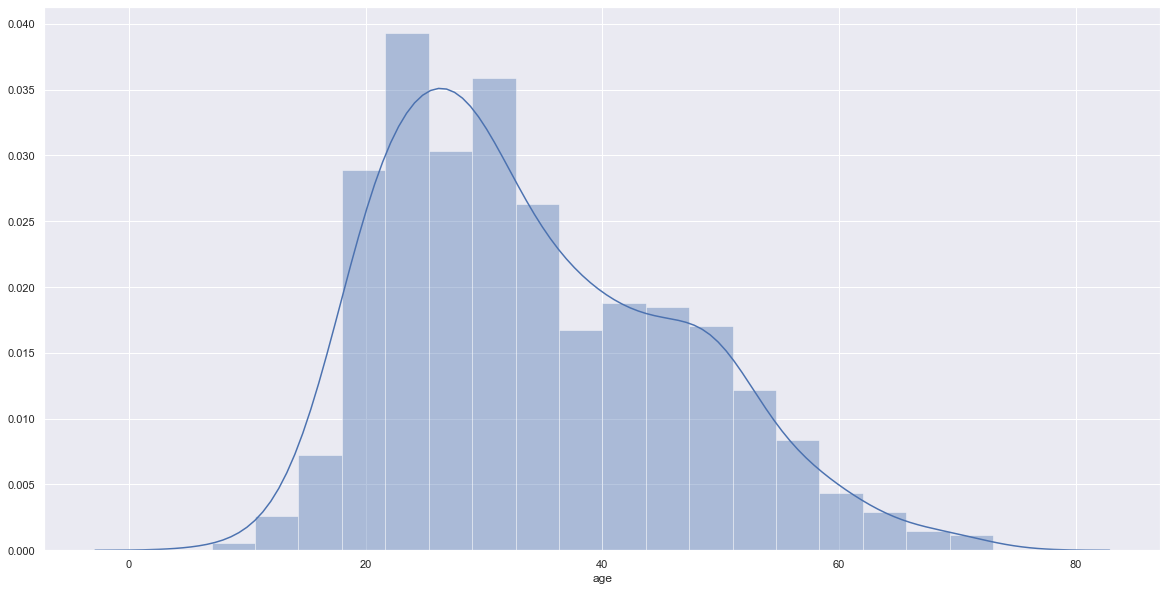

In [54]:
plt.figure(figsize=(20,10))   
sns.distplot(df3 ['age'])     # distplot fo age

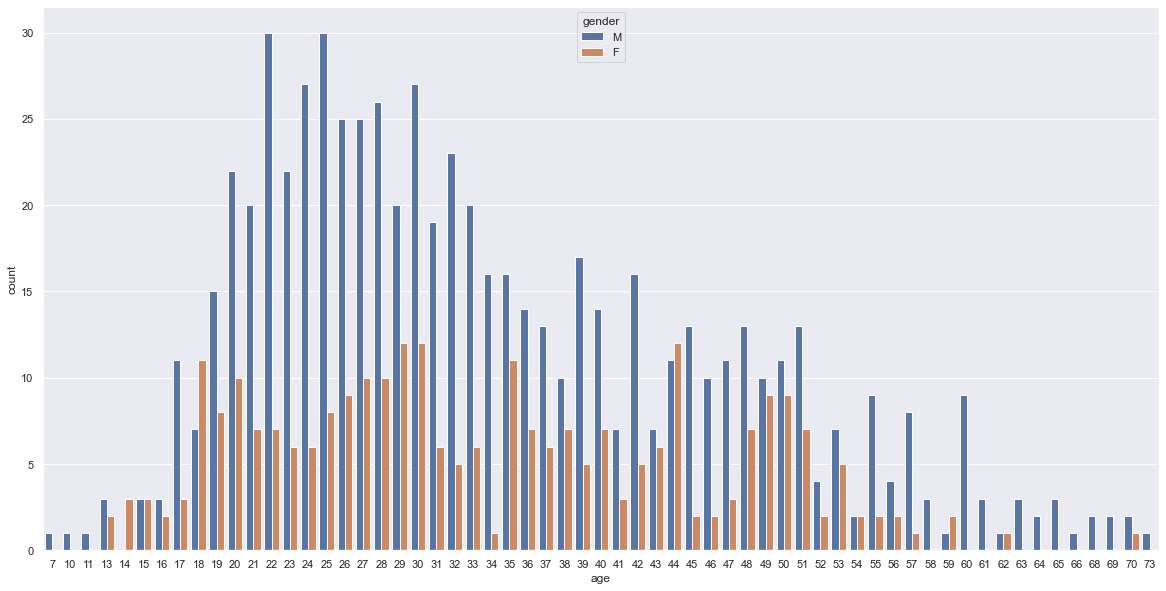

In [55]:
plt.figure(figsize=(20,10)) 
sns.countplot(df3['age'],hue=df3['gender']);

In [56]:
df10 = pd.merge(df3,df1,how='outer',on='user id') # d10 = merge df3=user.csv and df1=data.csv using user id

In [57]:
df10

,user id,age,gender,occupation,zip code,movie id,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883
...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,888640027
99996,943,22,M,student,77841,219,4,888639575
99997,943,22,M,student,77841,796,3,888640311
99998,943,22,M,student,77841,739,4,888639929


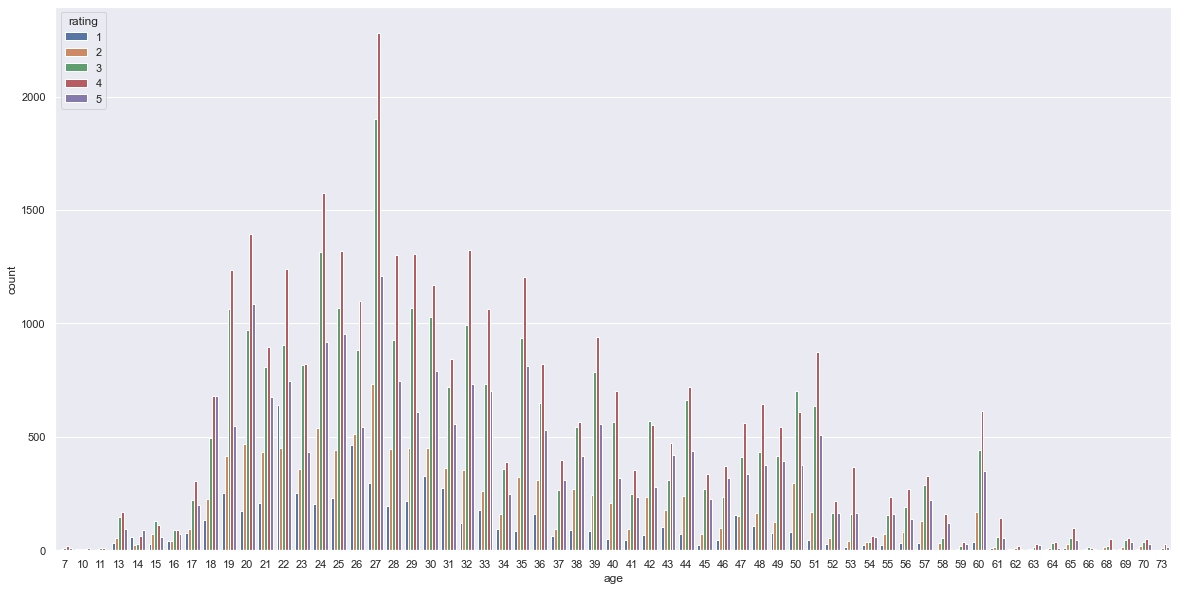

In [58]:
plt.figure(figsize=(20,10)) 
sns.countplot(df10['age'],hue=df10['rating']); # majority providing rating are between age 18 to 36

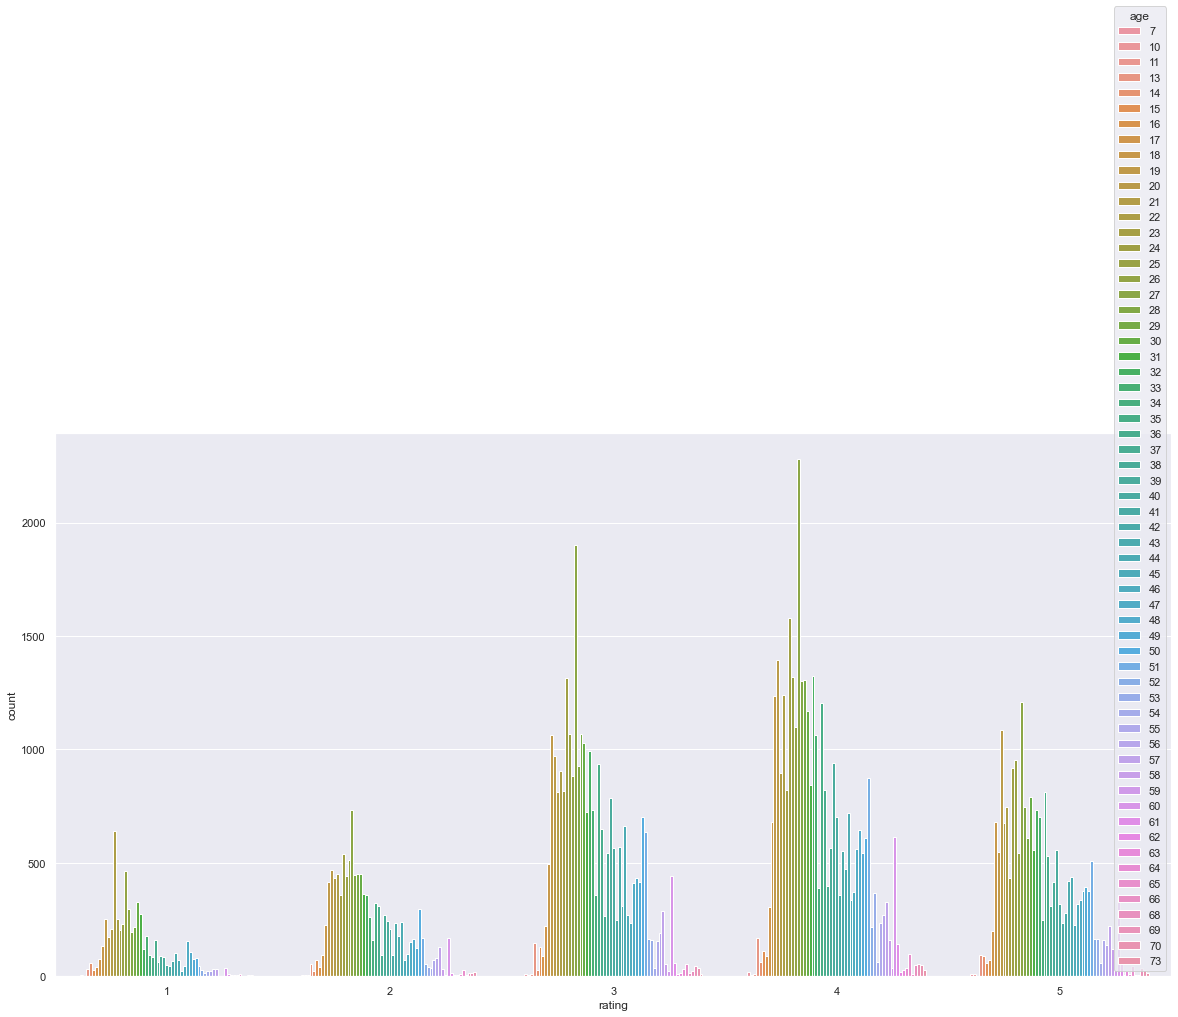

In [59]:
# below output majority of rating are 4 then 3 the age color spectrum shows age groups are equally spread out for both ratings
plt.figure(figsize=(20,10)) 
sns.countplot(df10['rating'],hue=df10['age']); 

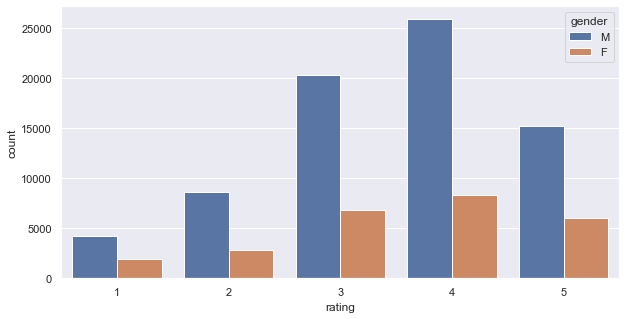

In [60]:
plt.figure(figsize=(10,5)) 
sns.countplot(df10['rating'],hue=df10['gender']); # 1 to 5 ratings given by male and female 

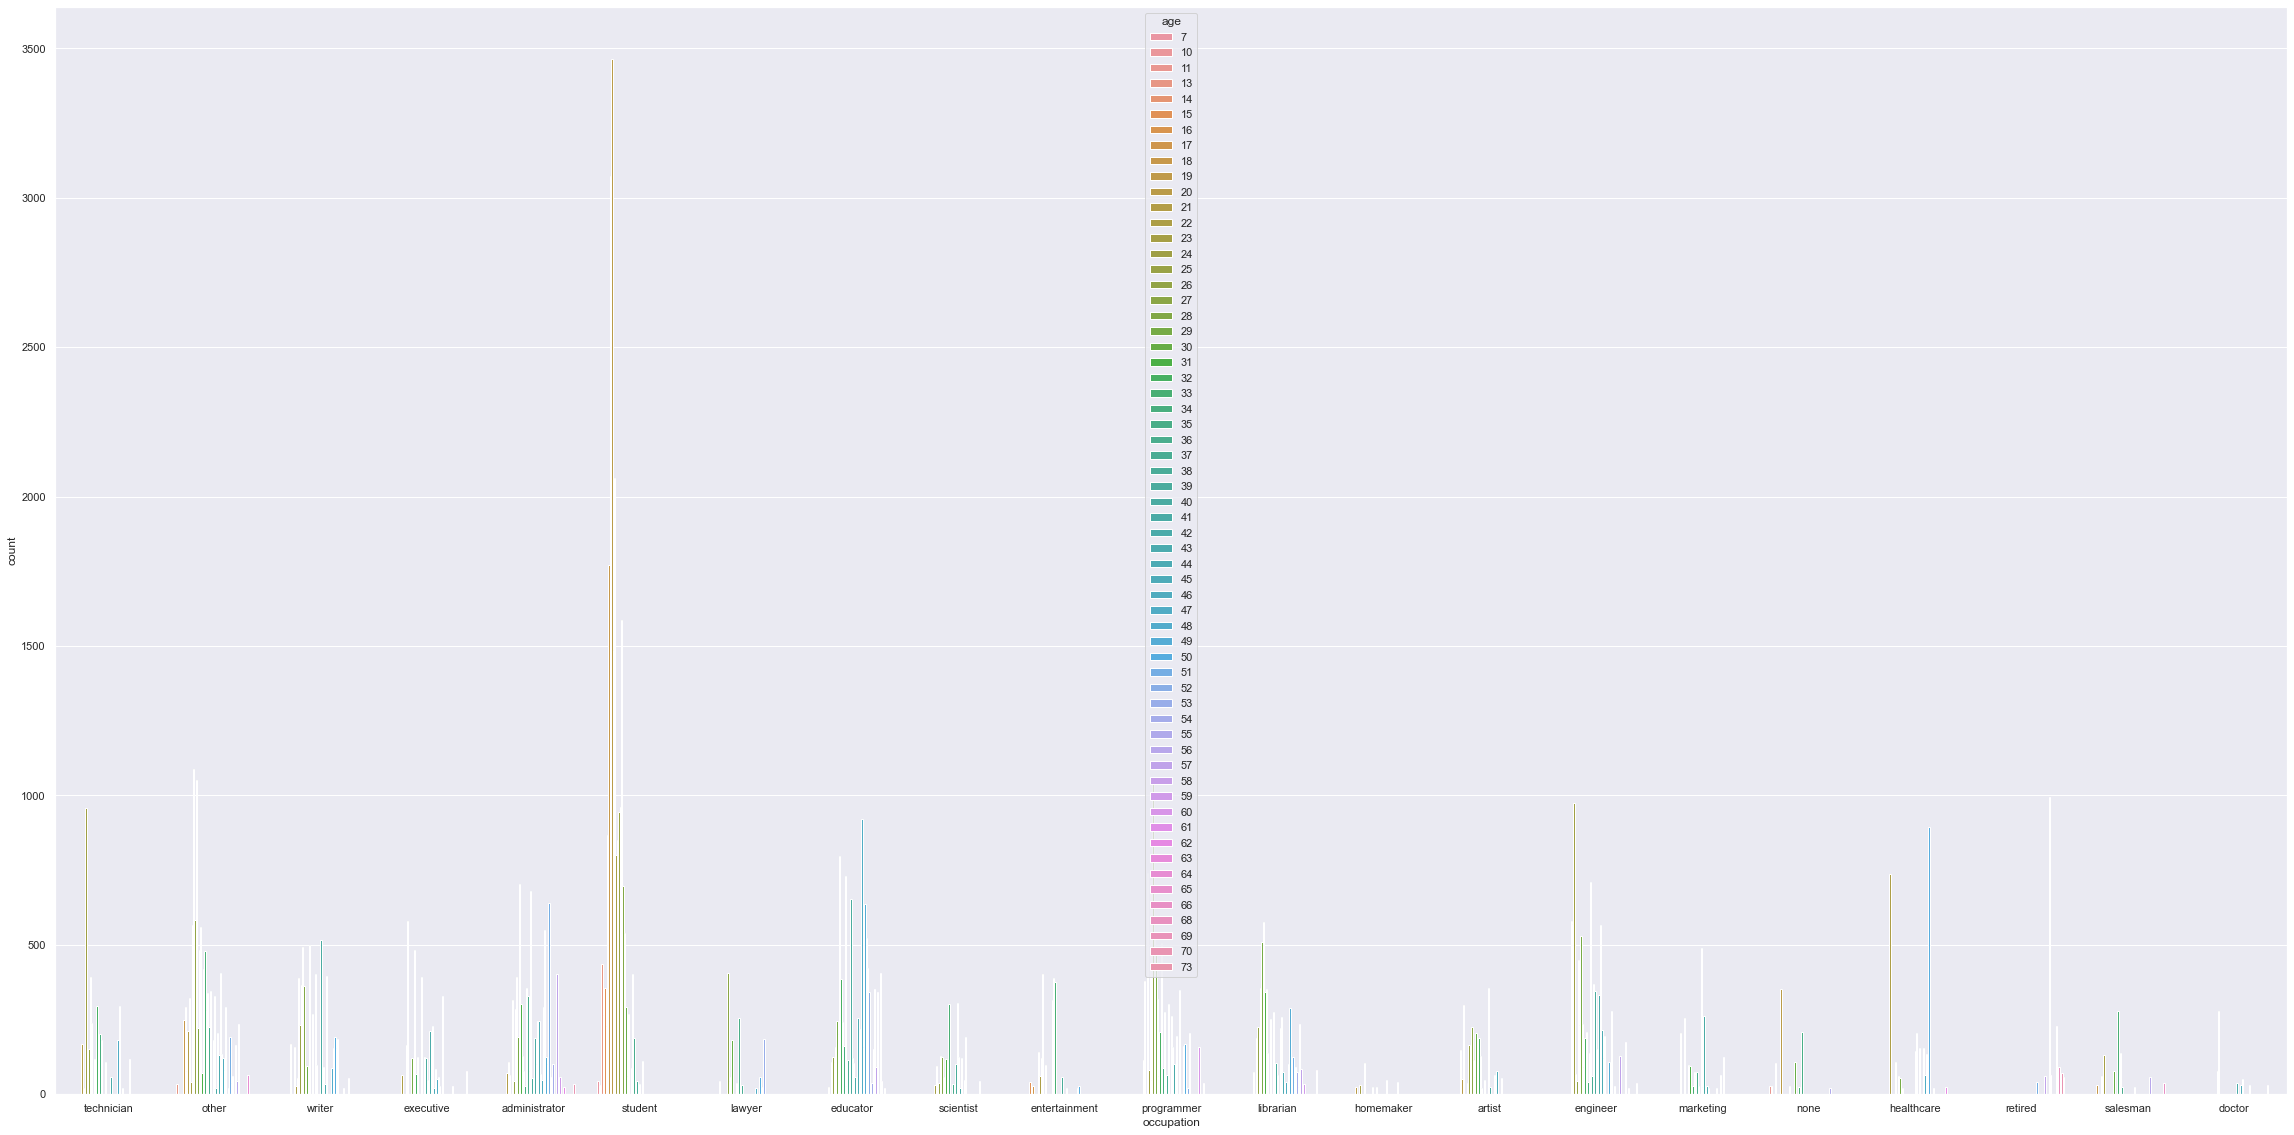

In [61]:
plt.figure(figsize=(40,20)) 
#sns.countplot(df10['age'],hue=df10['occupation']);
sns.countplot(df10['occupation'],hue=df10['age']);  # majority are students 

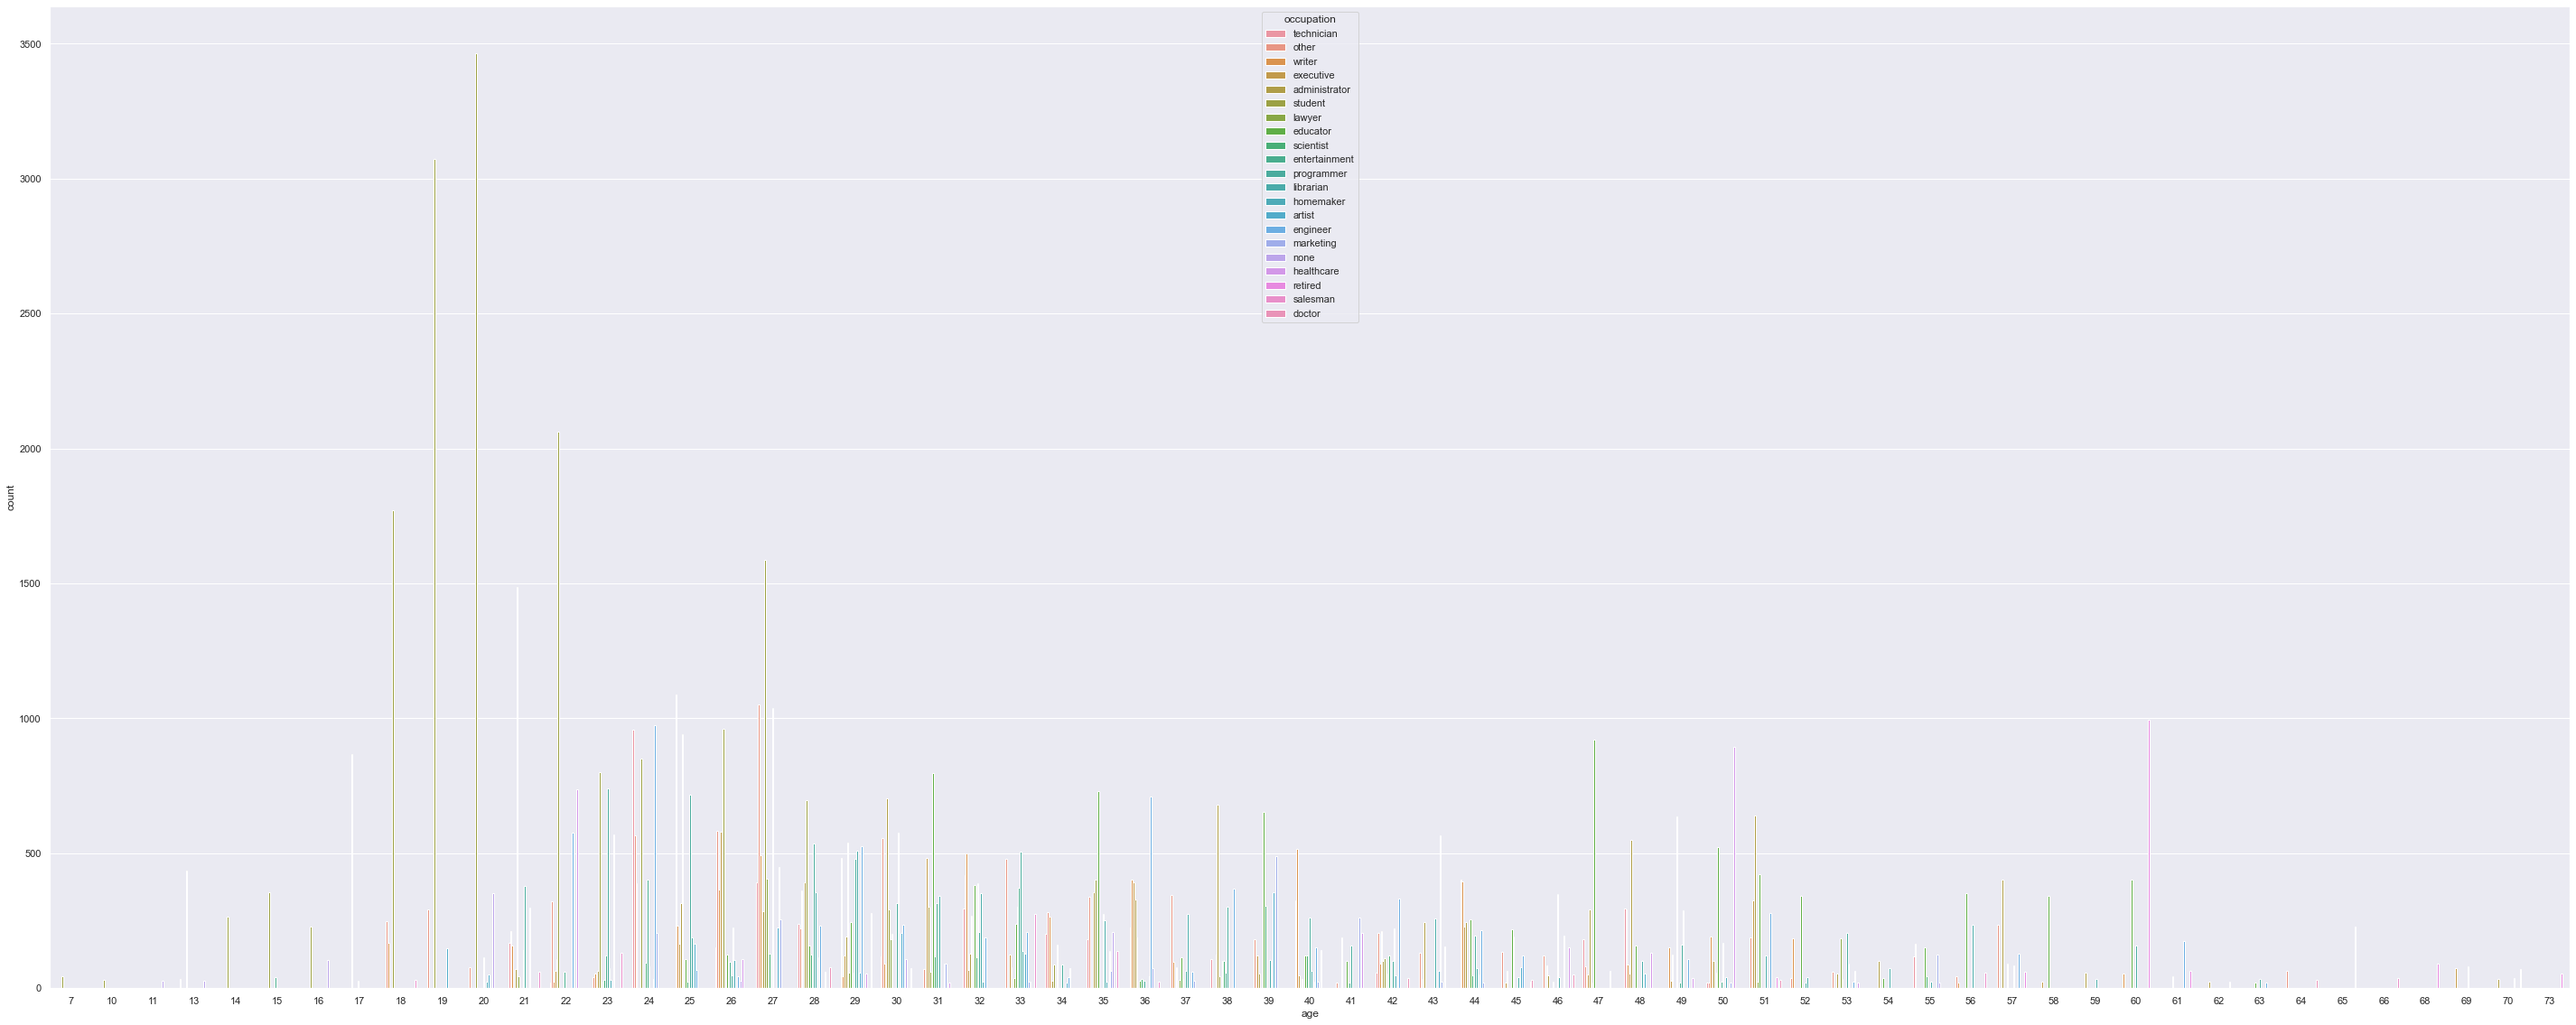

In [62]:
plt.figure(figsize=(50,20)) 
sns.countplot(df10['age'],hue=df10['occupation']); 
# age wise 18 top 27 are the biggest users watching the movies 

In [63]:
# Because we had dropped movie id before importing df2 = item.csv file again for merging with d10
# Need to extract and add Release Year Column from Release date column
df2=pd.read_csv('item.csv') 

In [64]:
# also need to add the Genre_Sum  ---- May not be required ############################################ to be deleted #####
# also need to create new column 'Release Year '
# from df2= 'release date' column extract and create new column 'release year'
df2['release year'] = pd.DatetimeIndex(df2['release date']).year 
#df2.head()

In [65]:
df2   # to check if 'release year ' was added to the right most column

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


In [66]:
# Trial to be deleted later
df2.groupby ('release date')['movie title'].sum().sort_values(ascending = True).head(10)

release date
01-Jan-1957    12 Angry Men Bridge on the River Kwai, The Old...
01-Jan-1954    20,000 Leagues Under the Sea Sabrina Dial M fo...
01-Jan-1968    2001: A Space Odyssey Night of the Living Dead...
01-Jan-1935    39 Steps, The Bride of Frankenstein Top Hat He...
01-Jan-1938    Adventures of Robin Hood, The Bringing Up Baby...
22-Jul-1996                                       Aiqing wansui 
01-Aug-1997    Air Bud In the Company of Men Spawn Picture Pe...
01-Jan-1992    Aladdin Lawnmower Man, The Reservoir Dogs Basi...
21-Aug-1996                                              Alaska 
01-Jan-1951    Alice in Wonderland Day the Earth Stood Still,...
Name: movie title, dtype: object

In [67]:
# Trial to be deleted later
df2.groupby ('movie title')['release year'].sum().sort_values(ascending = True).head(100)  # movie title and year of release

movie title
Nosferatu (Nosferatu, eine Symphonie des Grauens)     1922
Blue Angel, The (Blaue Engel, Der)                    1930
M                                                     1931
Farewell to Arms, A                                   1932
Liebelei                                              1933
                                                      ... 
Last Time I Saw Paris, The                            1954
Dial M for Murder                                     1954
Rebel Without a Cause                                 1955
Picnic                                                1955
East of Eden                                          1955
Name: release year, Length: 100, dtype: int64

In [68]:
df11 = pd.merge(df10,df2, how='outer',on='movie id') # d11= merge df10 ( df1 & df3) and df2=item.csv using movie id 
# d11 has d10( df3 & df1) and df2 combined all CSV files 

In [69]:
df11 
# need to add 

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,17,M,student,60089,1679,3,889289491,B. Monkey,06-Feb-1998,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1998.0
99996,863,17,M,student,60089,1678,1,889289570,Mat' i syn,06-Feb-1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.0
99997,863,17,M,student,60089,1680,2,889289570,Sliding Doors,01-Jan-1998,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1998.0
99998,896,28,M,writer,91505,1681,3,887160722,You So Crazy,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0


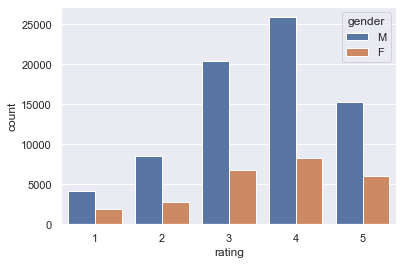

In [70]:
sns.countplot(df11['rating'],hue=df11['gender']);    #####     to delete

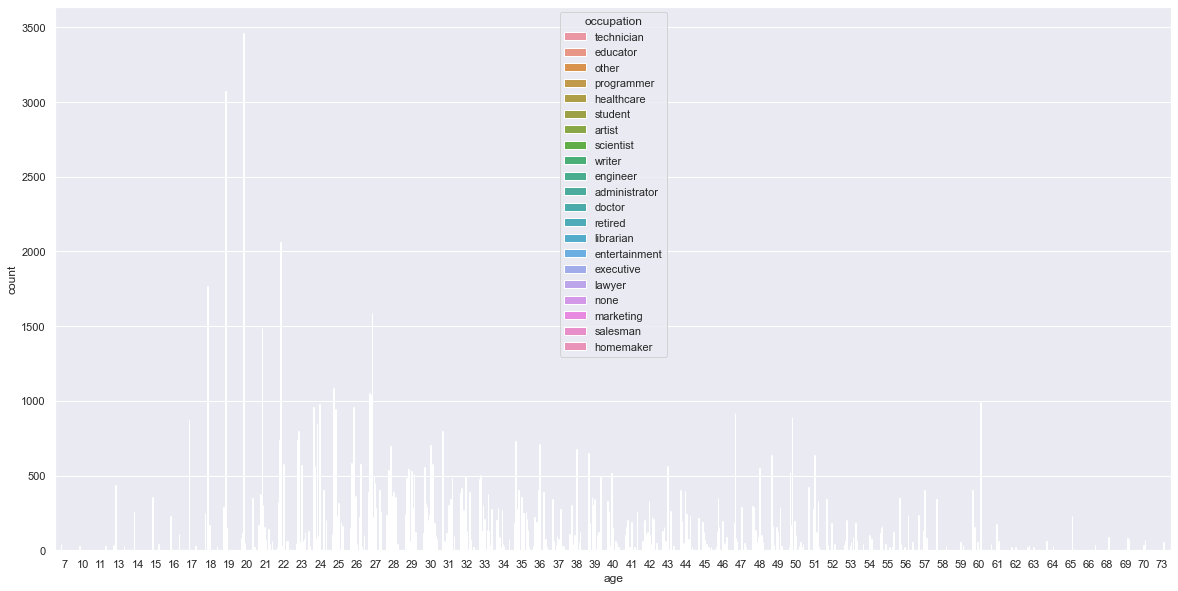

In [71]:
plt.figure(figsize=(20,10))    # to delete does not make sense
sns.countplot(df11['age'],hue=df11['occupation']);

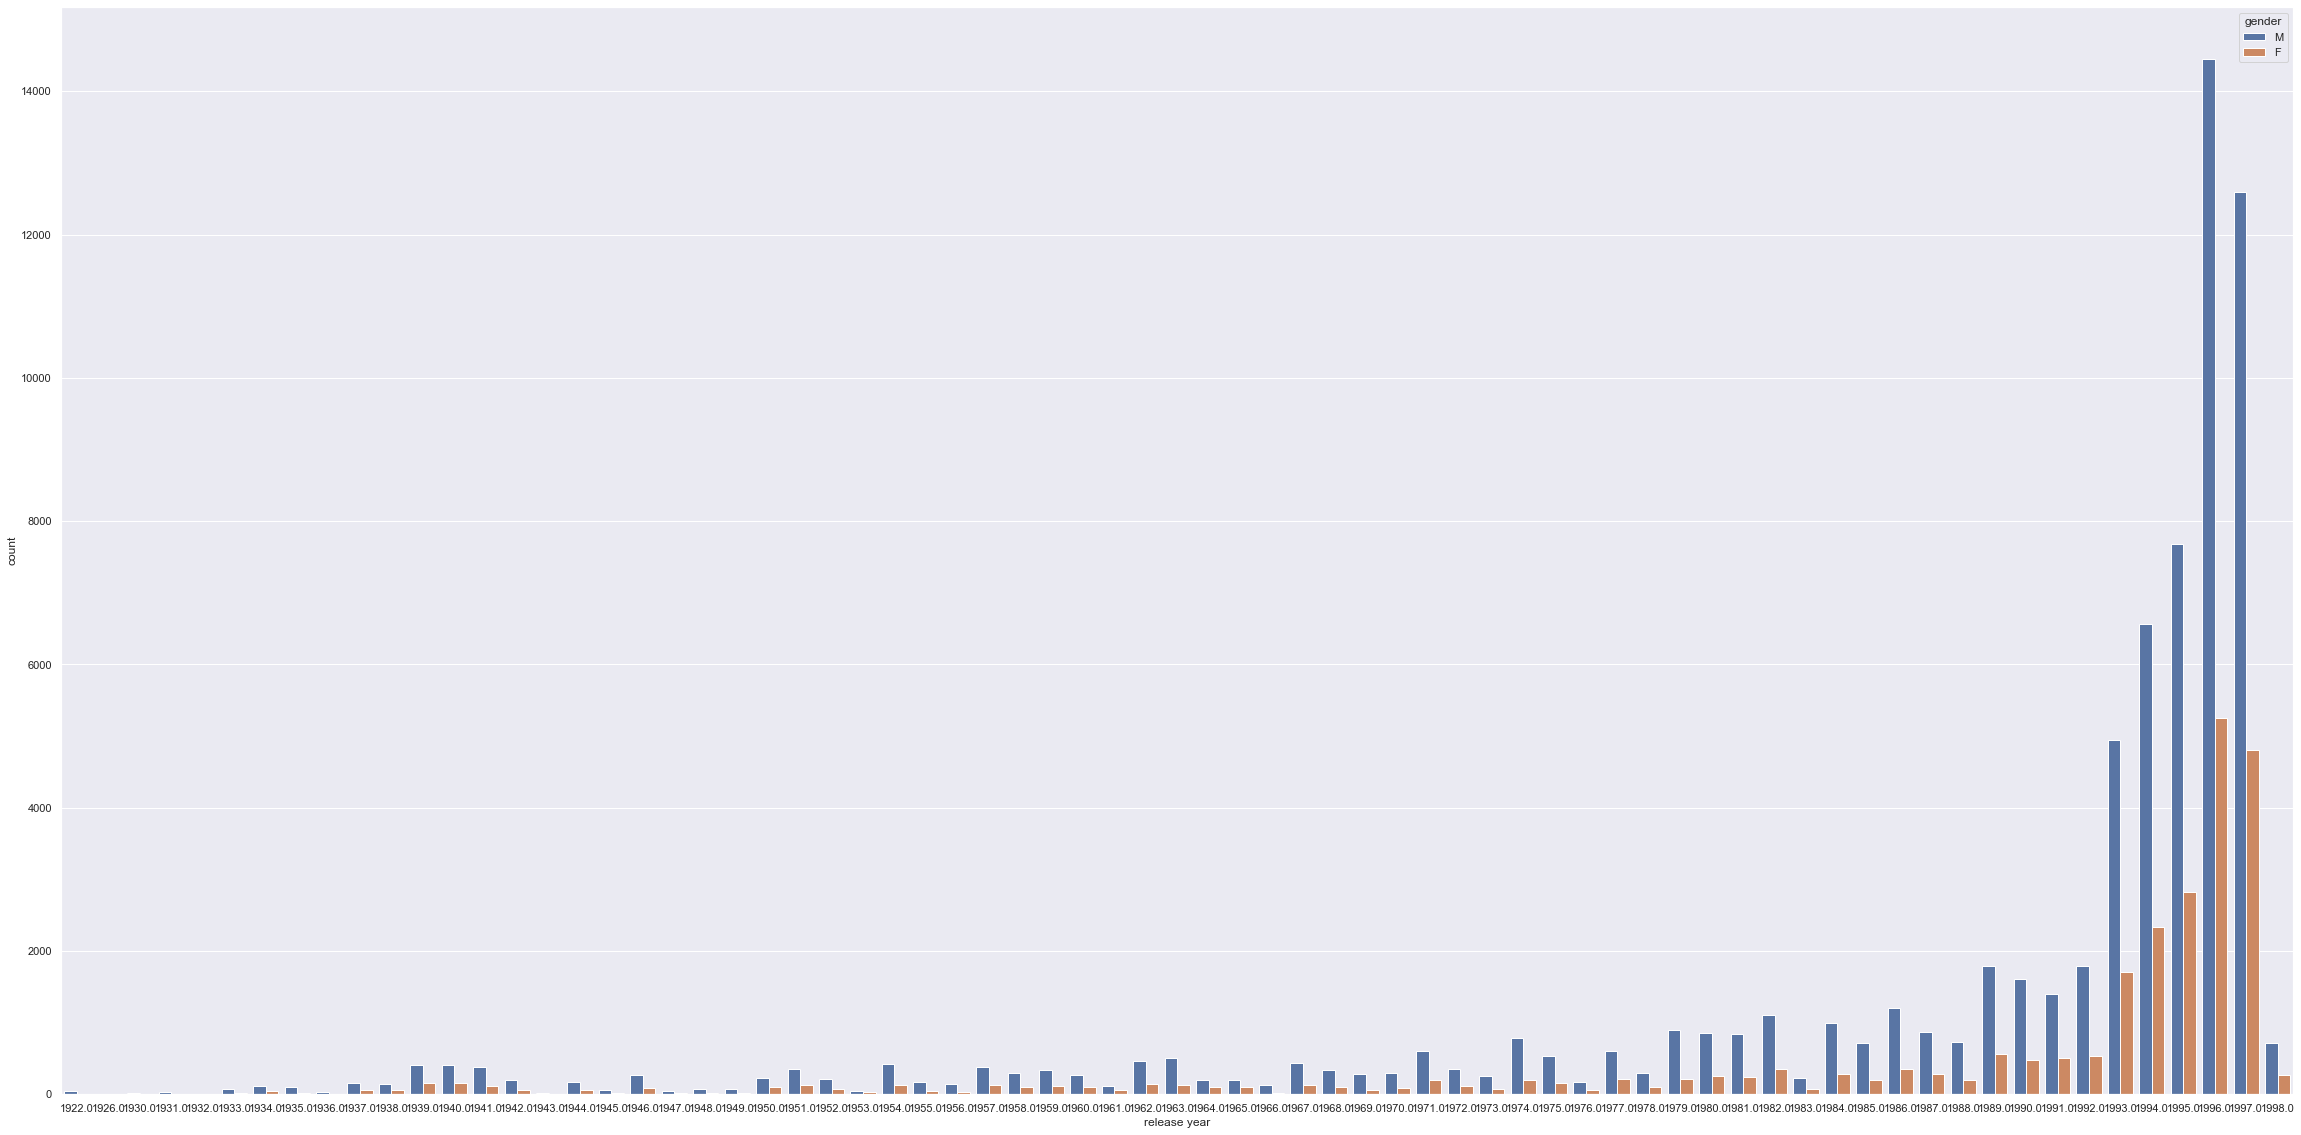

In [72]:
plt.figure(figsize=(40,20)) 
sns.countplot(df11['release year'],hue=df11['gender']); 
# Movie release year (old movie vs new movie) both male and female watched new movies more
# 1990's more movies hve been watched by more males and females

In [73]:
# from df2= 'release date' column extract and create new column 'release year'
df11['release year'] = pd.DatetimeIndex(df11['release date']).year 
df11.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0


<AxesSubplot:xlabel='release year'>

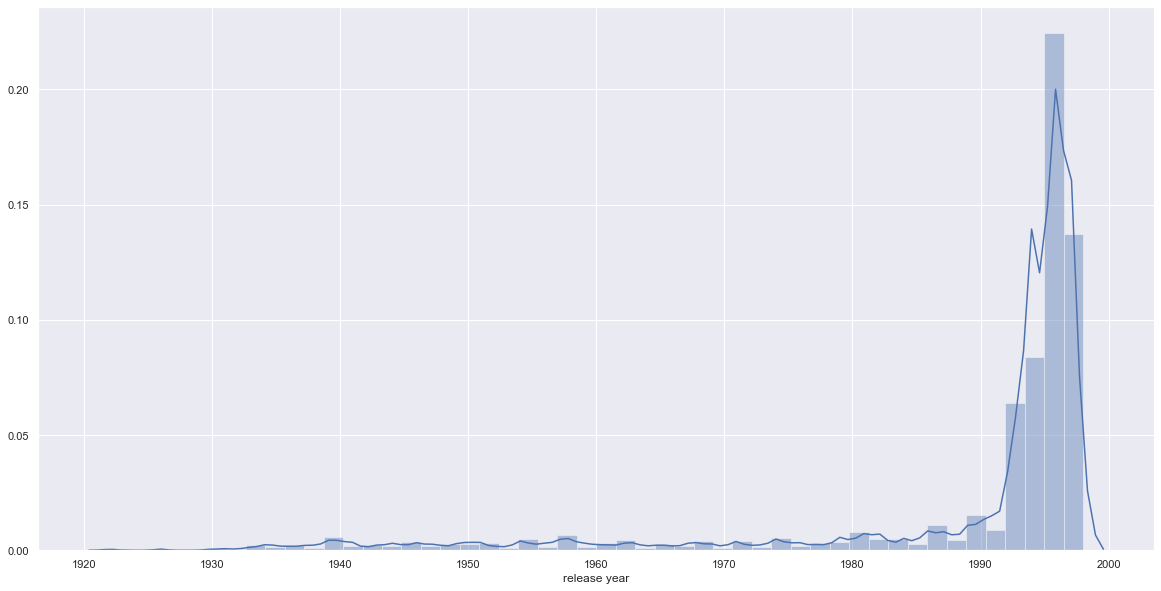

In [74]:
plt.figure(figsize=(20,10))   
sns.distplot(df2 ['release year'])  # more movies have been released in year 1990's to 2000's

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [75]:
#Your answer here
#df11[df11['year']!= 1998]   #    !=  not equal to 1998
#print()

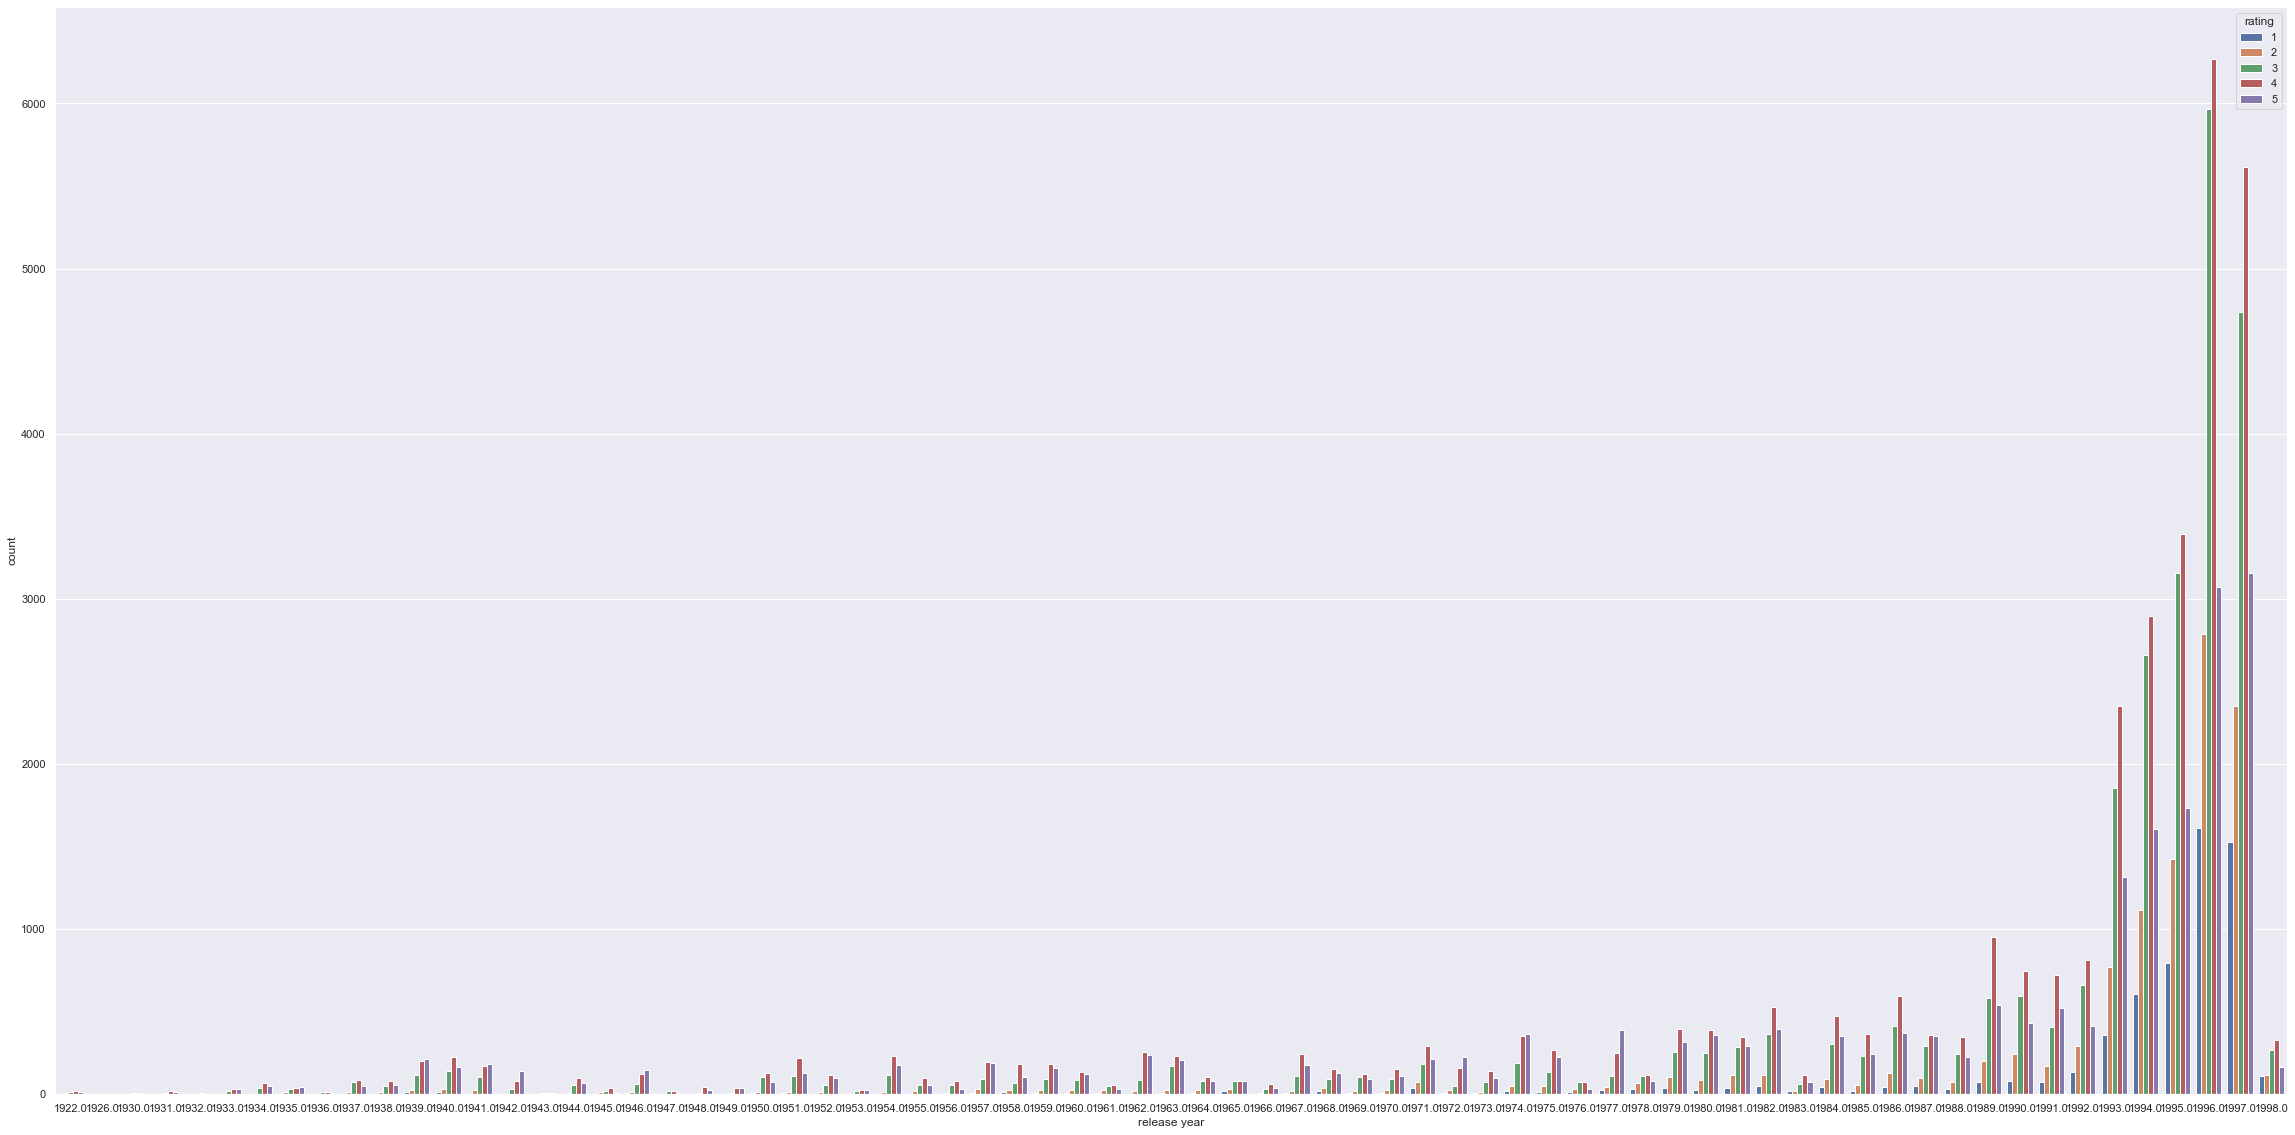

In [76]:
plt.figure(figsize=(40,20)) 
sns.countplot(df11['release year'],hue=df11['rating']); # majority providing rating are between age 18 to 36

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [77]:
# Top 25 Most rated movies 
df15 = df11.groupby('movie title').size().sort_values(ascending=False)[:25] # most rated movies df11 is already merged df
df15

movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Back to the Future                     350
Titanic                                350
Mission: Impossible                    344

In [78]:
df2=pd.read_csv('item.csv') # read the original csv file for below analysis

In [79]:
df2

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df2.sum (axis=0)

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [81]:
# sum of all coloumn currently adding the year extract need to add before extrating year from date
# ' Genre_Sum' is the last column to the right 22nd column
df2['Genre_Sum'] = df2.sum(axis=1)   # adds up all '1' in Genre in a row  and Sum is shown in new column 'Genre_Sum'

In [82]:
df2

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genre_Sum
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,4
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1679
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1681
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1682
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1682


In [83]:
df2

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genre_Sum
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,4
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1679
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1681
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1682
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1682


In [85]:
plt.figure(figsize=(40,20)) 
sns.countplot(df2['release year'],hue=df2['Genre_Sum']); #More genre were available and most watched from 1993 and 1997

KeyError: 'release year'

<Figure size 2880x1440 with 0 Axes>

In [84]:
plt.figure(figsize=(40,20)) 
sns.countplot(df2['release year'],hue=df2['Genre_Sum']); #More genre were available and most watched from 1993 and 1997

KeyError: 'release year'

<Figure size 2880x1440 with 0 Axes>

In [96]:
df11

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,17,M,student,60089,1679,3,889289491,B. Monkey,06-Feb-1998,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1998.0
99996,863,17,M,student,60089,1678,1,889289570,Mat' i syn,06-Feb-1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.0
99997,863,17,M,student,60089,1680,2,889289570,Sliding Doors,01-Jan-1998,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1998.0
99998,896,28,M,writer,91505,1681,3,887160722,You So Crazy,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [87]:
df11

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,17,M,student,60089,1679,3,889289491,B. Monkey,06-Feb-1998,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1998.0
99996,863,17,M,student,60089,1678,1,889289570,Mat' i syn,06-Feb-1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.0
99997,863,17,M,student,60089,1680,2,889289570,Sliding Doors,01-Jan-1998,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1998.0
99998,896,28,M,writer,91505,1681,3,887160722,You So Crazy,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0


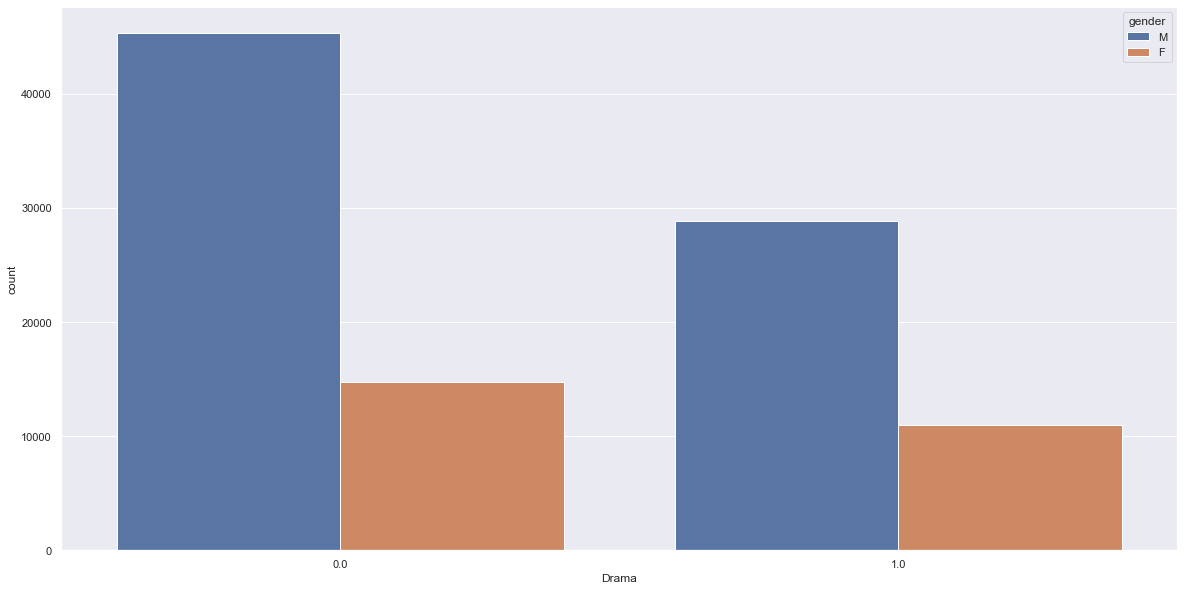

In [92]:
plt.figure(figsize=(20,10)) 
sns.countplot(df11['Drama'],hue=df11['gender']);   

# Men watch more Drama than women = True
# from below right side bar plot '1.0' shows Male(M) watched more Drama than Female(F)


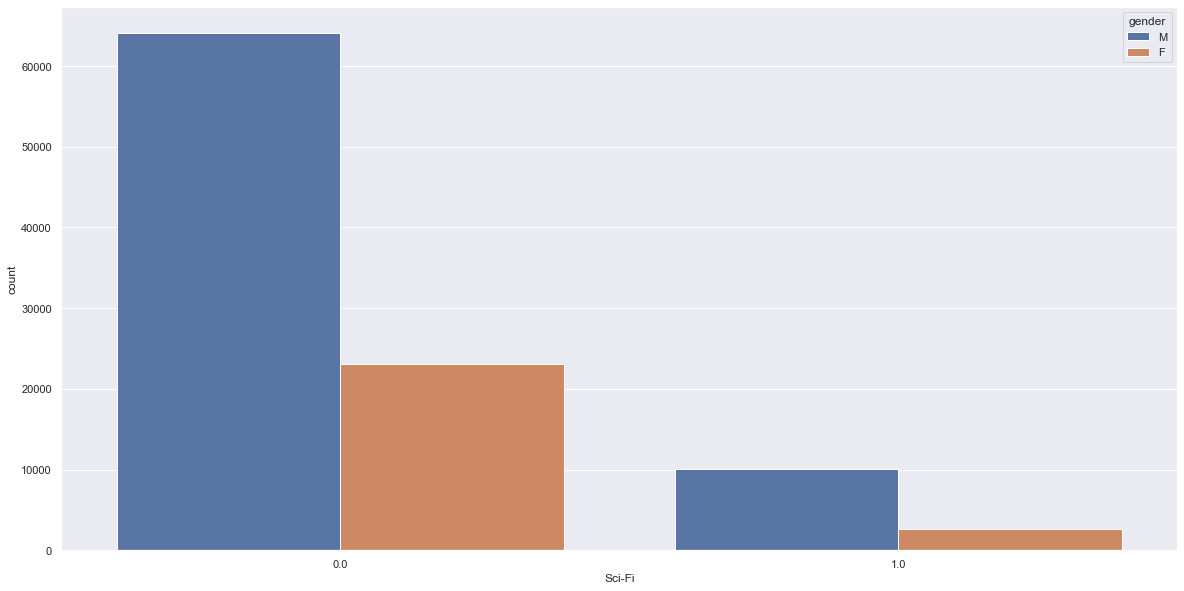

In [93]:
plt.figure(figsize=(20,10)) 
sns.countplot(df11['Sci-Fi'],hue=df11['gender']);   

# Women watch more Sci-Fi than men = False
# from below right side bar plot '1.0' shows Female(F) watched less Sci-Fi than Male(M)


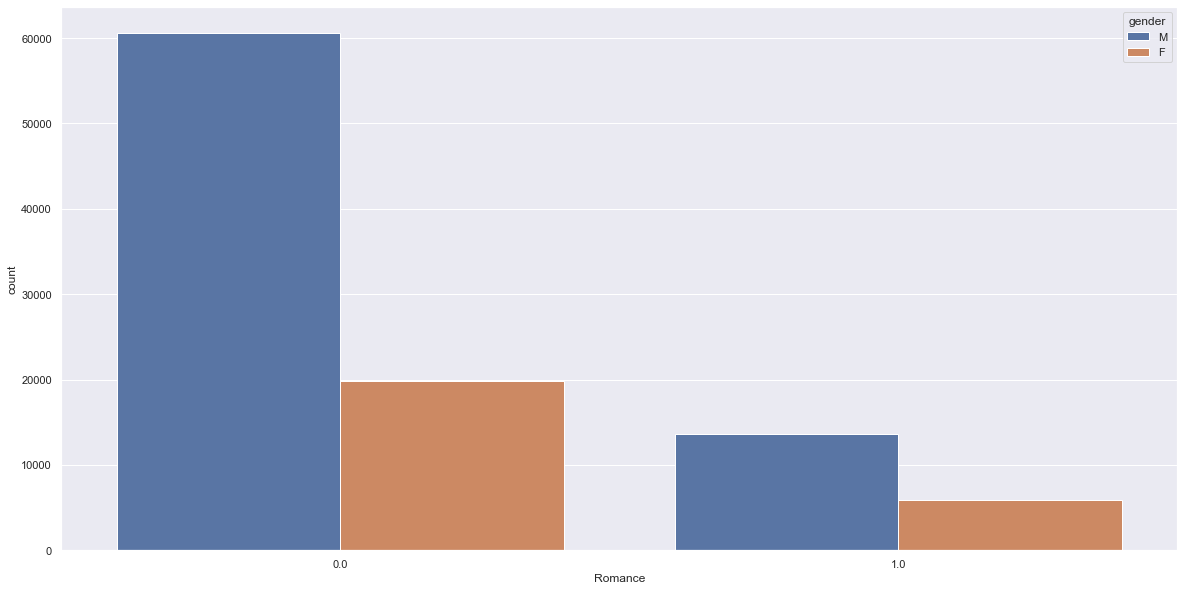

In [94]:
plt.figure(figsize=(20,10)) 
sns.countplot(df11['Romance'],hue=df11['gender']);   
# Men watch more Romance than women = True
# from below right side bar plot '1.0' shows Male(M) watched more Romance than Female(F)


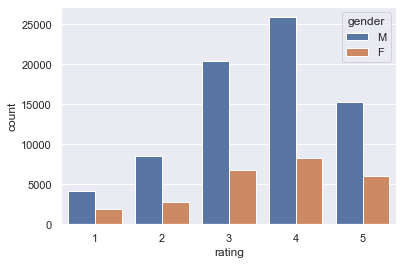

In [95]:
sns.countplot(df11['rating'],hue=df11['gender']);